# Introduction
Hello people, welcome to this kernel! In this kernel I will predict genders of students according their exams. Before starting let's take a look at our content

# Notebook Content
1. Importing Data and Libraries 
1. Data Overview
1. Simple Data Analyses 
    * Gender Countplot
    * Race Countplot
    * Parental Level Of Education Countplot
    * Lunch Countplot
    * Test Preparation Course Countplot
    * Math Score
    * Reading Score
    * Writing Score
1. Detailed Data Analyses
    * Correlation Heatmap
    * Relation Between Gender - Math Score
    * Relation Between Gender - Writing Score
    * Relation Between Gender - Reading Score
    * Relation Between Race - Math Score
    * Relation Between Race - Writing Score
    * Relation Between Race - Reading Score
1. Data Preprocessing
1. Building Model Using Pytorch
1. Fitting Model Using Pytorch
1. Evaulating Results
1. Conclusion



# Importing Data and Libraries

In this section I am going to import libraries and the data that I wil use. 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn

from sklearn.model_selection import train_test_split

import warnings as wrn

wrn.filterwarnings('ignore') # Filter unrelevant warnings
sns.set_style("darkgrid")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/students-performance-in-exams/StudentsPerformance.csv


In [2]:
# Importing data
data = pd.read_csv('/kaggle/input/students-performance-in-exams/StudentsPerformance.csv')

# Data Overview
In this section I am going to take look at the data.

In [3]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


* There are eight features in the dataset. 5 of them are categorical and 3 of them are numerical.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


# Simple Data Analyses
In this section I am going to do some simple EDA. 

## Countplots/Histograms of Features

### Gender Countplot

In [5]:
data["gender"].value_counts()

female    518
male      482
Name: gender, dtype: int64

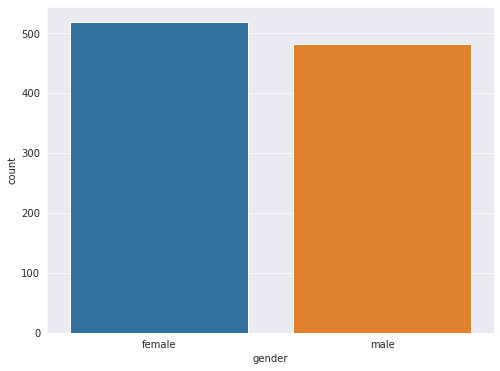

In [6]:
fig,ax = plt.subplots(figsize=(8,6))
sns.countplot(data["gender"])
plt.show()

* Although female entries are a bit more, our data is balanced.
* We should convert this feature into integer.

### Race Countplot

In [7]:
data["race/ethnicity"].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

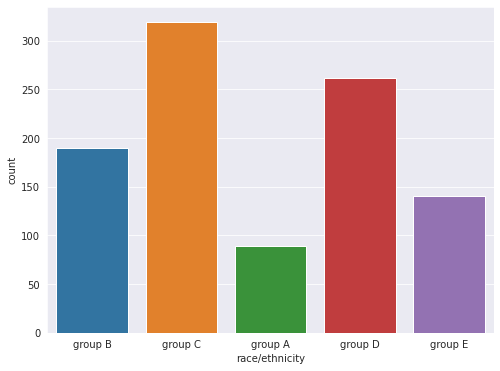

In [8]:
fig,ax = plt.subplots(figsize=(8,6))
sns.countplot(data["race/ethnicity"])
plt.show()

* Most of the dataset's group is group D.
* Entries of this feature is unbalanced. 
* We should convert this feature into categorical, and after that we should encode it.

### Parental Level Of Education Countplot

In [9]:
data["parental level of education"].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

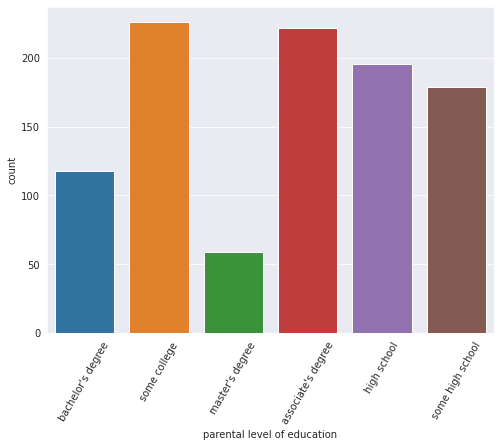

In [10]:
fig,ax = plt.subplots(figsize=(8,6))
sns.countplot(data["parental level of education"])
plt.xticks(rotation=60)
plt.show()

* We should convert this feature into categorical and then we should encode it.

### Lunch Countplot

In [11]:
data["lunch"].value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

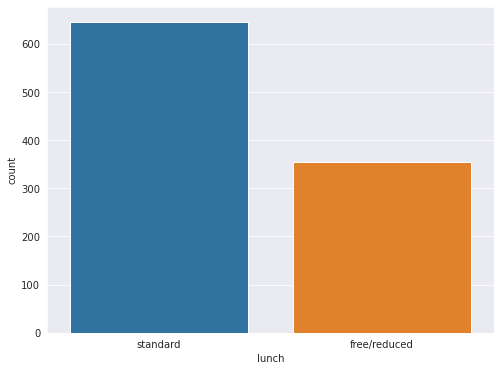

In [12]:
fig,ax = plt.subplots(figsize=(8,6))
sns.countplot(data["lunch"])
plt.show()

* This feature is definetely unbalanced.
* We should convert this feature into categorical and after that we should encode it.

### Test Preparation Course Countplot

In [13]:
data["test preparation course"].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

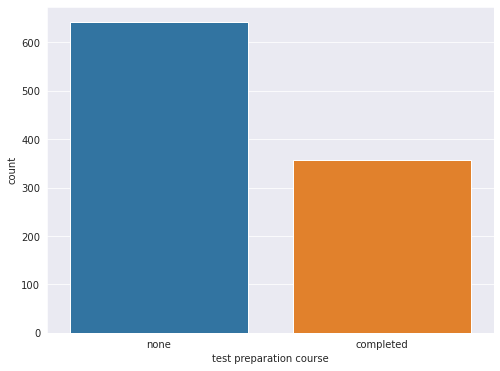

In [14]:
fig,ax = plt.subplots(figsize=(8,6))
sns.countplot(data["test preparation course"])
plt.show()

* Don't be confused because of the "none" label. It does not mean it is a missing value. 
* We should convert and encode this feature.

### Math Score Histogram

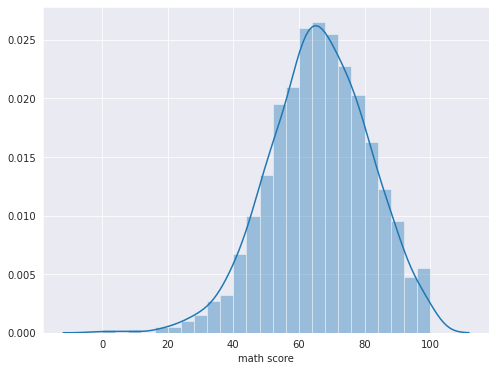

In [15]:
fig,ax = plt.subplots(figsize=(8,6))
sns.distplot(data["math score"])
plt.show()

* Most of the students took score between 50 and 100.
* Although there are scores between 0 and 40, they are so rare.
* I am wondering the relation between math score and gender but it is not the subject of this section, we will examine that in Detailed Data Analyses.

### Writing Score Histogram

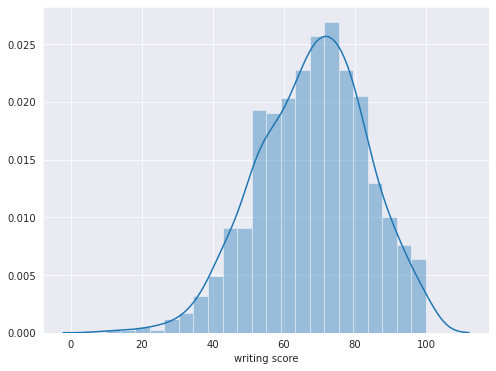

In [16]:
fig,ax = plt.subplots(figsize=(8,6))
sns.distplot(data["writing score"])
plt.show()

* This plot is very similar with the previous plot.
* I can't say anything new, everything is same with the math score.

### Reading Score Histogram

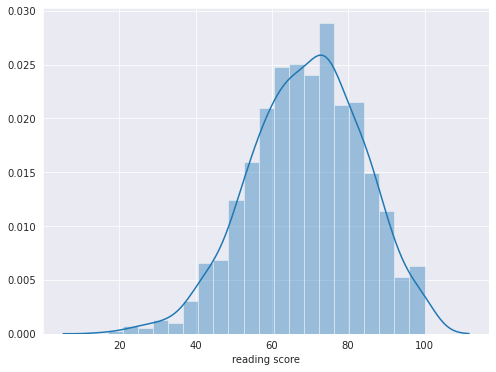

In [17]:
fig,ax = plt.subplots(figsize=(8,6))
sns.distplot(data["reading score"])
plt.show()

# Detailed Data Analyses

In previous section we've examined the distrubiton of dataset, and now We are going to examine the relations between feautures, especially relations between gender and other features. Let's start with the heatmap

## Correlation Heatmap

In [18]:
data.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


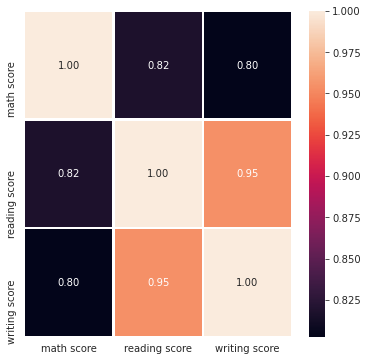

In [19]:
fig,ax = plt.subplots(figsize=(6,6))
sns.heatmap(data.corr(),annot=True,fmt="0.2f",linewidths=1.5)
plt.show()

* All of the features are correlated with each others. 

## Relation Between Gender - Math Score 

In [20]:
gender_math = data.groupby("gender")["math score"].mean()
gender_math

gender
female    63.633205
male      68.728216
Name: math score, dtype: float64

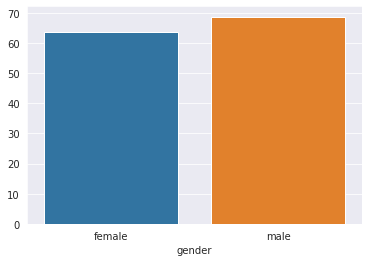

In [21]:
sns.barplot(gender_math.index,gender_math.values)
plt.show()

* Although scores are close, male's score is better.


## Relation Between Gender - Writing Score

In [22]:
gender_writing = data.groupby("gender")["writing score"].mean()
gender_writing

gender
female    72.467181
male      63.311203
Name: writing score, dtype: float64

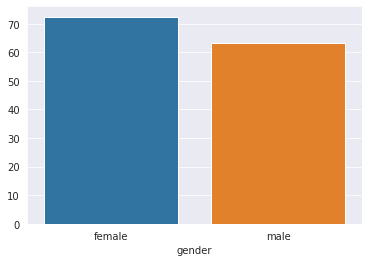

In [23]:
sns.barplot(gender_writing.index,gender_writing.values)
plt.show()


* Unlike the previous feature, scores are far. 
* We can say that, women are better in writing exam

## Relation Between Gender - Reading Score

In [24]:
gender_reading = data.groupby("gender")["reading score"].mean()
gender_reading

gender
female    72.608108
male      65.473029
Name: reading score, dtype: float64

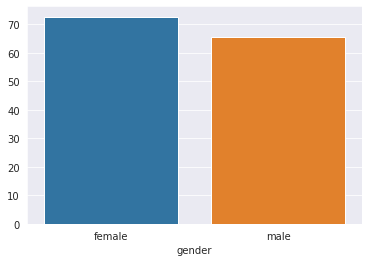

In [25]:
sns.barplot(gender_reading.index,gender_reading.values)
plt.show()

* Like the writing score, women are better in writing exam.

## Relation Between Race - Math Score


In [26]:
race_math = data.groupby("race/ethnicity")["math score"].mean()
race_math

race/ethnicity
group A    61.629213
group B    63.452632
group C    64.463950
group D    67.362595
group E    73.821429
Name: math score, dtype: float64

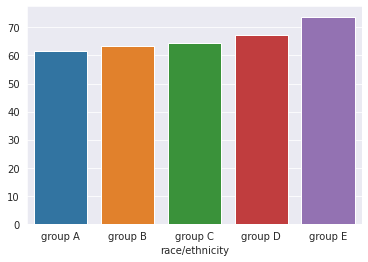

In [27]:
sns.barplot(race_math.index,race_math.values)
plt.show()

* Bad to good teams:


1. Group A
1. Group B
1. Group C
1. Group D
1. Group E

## Relation Between Race - Writing Score

In [28]:
race_writing = data.groupby("race/ethnicity")["writing score"].mean()
race_writing

race/ethnicity
group A    62.674157
group B    65.600000
group C    67.827586
group D    70.145038
group E    71.407143
Name: writing score, dtype: float64

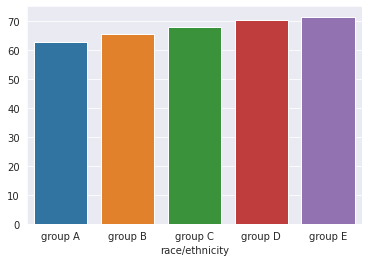

In [29]:
sns.barplot(race_writing.index,race_writing.values)
plt.show()

* Like the math score, the sequence of groups is the same.

## Relation Between Race - Reading Score

In [30]:
race_reading = data.groupby("race/ethnicity")["reading score"].mean()
race_reading

race/ethnicity
group A    64.674157
group B    67.352632
group C    69.103448
group D    70.030534
group E    73.028571
Name: reading score, dtype: float64

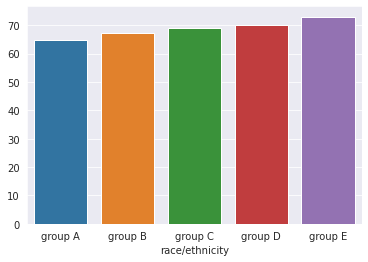

In [31]:
sns.barplot(race_reading.index,race_reading.values)
plt.show()

# Data Preprocessing

We analysed the data and now we are ready for processing the data. In this section I will follow these steps:

* Converting Label Into Int64
* Creating X and Y
* One Hot Encoding
* X Normalization
* Train Test Split

## Converting Label Into Int64

In [32]:
print(data.values[0])
data["gender"] = [1 if each == "female" else 0 for each in data["gender"]]
data.head(1)

['female' 'group B' "bachelor's degree" 'standard' 'none' 72 72 74]


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,1,group B,bachelor's degree,standard,none,72,72,74


## Creating X and Y

In [33]:
x = data.drop("gender",axis=1)
y = data.gender
x.head()

,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,group B,bachelor's degree,standard,none,72,72,74
1,group C,some college,standard,completed,69,90,88
2,group B,master's degree,standard,none,90,95,93
3,group A,associate's degree,free/reduced,none,47,57,44
4,group C,some college,standard,none,76,78,75


## One Hot Encoding

In [34]:
x_encoded = pd.get_dummies(x,columns=["race/ethnicity","parental level of education","lunch","test preparation course"])
x_encoded.head()

,math score,reading score,writing score,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,72,72,74,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
1,69,90,88,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0
2,90,95,93,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
3,47,57,44,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
4,76,78,75,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1


## X Normalization

In [35]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))

x_scaled = scaler.fit_transform(x_encoded)
x_scaled[0]

array([0.72      , 0.6626506 , 0.71111111, 0.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 1.        ])

In [36]:
x_scaled.shape

(1000, 18)

In [37]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 18)
(200, 18)
(800,)
(200,)


# Building Model Using Pytorch

Our data is ready, so in this section We are going to build a simple ANN model using pytorch. I know, I can use traditional machine learning algorithms for processing this data, but I will use pytorch for exercising. 

We'll use a simple model like that:

1. Input Layer
1. Hidden Layer 1
1. Output Layer

And I will use Adam as optimizer and Cross Entropy as loss.

In [38]:
class ANN(nn.Module):
    
    def __init__(self):
        
        super(ANN,self).__init__()
        
        # Linear function 1
        self.linear1 = nn.Linear(18,10) # 18 to 10
        self.tanh1 = nn.Tanh()
        
        # Linear function 2
        self.linear2 = nn.Linear(10,6) # 10 to 6
        self.tanh2 = nn.Tanh()
        
        # Linear function 3
        self.linear3 = nn.Linear(6,2) # 6 to output
        
    
    def forward(self,x):
        
        out = self.linear1(x)
        out = self.tanh1(out)
        
        out = self.linear2(out)
        out = self.tanh2(out)
        
        out = self.linear3(out)
        return out
    

model = ANN()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)
error = nn.CrossEntropyLoss()

# Fitting Model Using Pytorch

Our frame of model is ready, and now let's train it.

In [39]:
# But before fitting, we must convert numpy arrays into torch tensors

x_train = torch.Tensor(x_train)
x_test = torch.Tensor(x_test)
y_train = torch.Tensor(y_train).type(torch.LongTensor)

In [40]:
epochs = 200
for epoch in range(epochs):
    
    # Clearing gradients
    optimizer.zero_grad()
    
    # Forward propagation
    outs = model(x_train)
    
    # Computing loss
    loss = error(outs,y_train)
    
    # Backward propagation
    loss.backward()
    
    # Updating parameters
    optimizer.step()
    
    if epoch%50 == 0:
        print(f"Cost after iteration {epoch} is {loss}")

Cost after iteration 0 is 0.7269741296768188
Cost after iteration 50 is 0.5415034294128418
Cost after iteration 100 is 0.22865648567676544
Cost after iteration 150 is 0.20205795764923096


# Evaulating Results

We trained our model in previous section. And now in this section we will predict x_test and after that we will evaulete the results.

In [41]:
from sklearn.metrics import accuracy_score
# Predicting 
y_head = model(x_test)
print(y_head[0])


# Converting predictions into labels
y_pred = torch.max(y_head,-1)[1]
print(y_pred[0])

print("Accuracy of model is ",accuracy_score(y_pred,y_test))

tensor([ 0.5169, -0.4599], grad_fn=<SelectBackward>)
tensor(0)
Accuracy of model is  0.92


# Conclusion

Thanks for your attention, if you have any questions in your mind, please ask. 